In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eigvalsh
from collections import namedtuple
import itertools

In [1]:
from collections import namedtuple
Material = namedtuple('Material',['Esc','Esa','Epc','Epa','Vss','Vscp','Vsap','Vxx','Vxy'])
C = Material(0.,0.,7.40,7.40,-15.2,10.25,10.25,3.,8.3)
Si = Material(0,0,7.2,7.2,-8.13,5.88,5.88,3.17,7.51)
Ge = Material(0,0,8.41,8.41,-6.78,5.31,5.31,2.62,6.82)
GaAs = Material(-6.01,-4.79,0.19,4.59,-7.00,7.28,3.70,0.93,4.72)
ZnSe = Material(-8.92,-0.28,0.12,7.42,-6.14,5.47,4.73,0.96,4.38)

In [11]:
def get_H(kx,ky,kz,structure=Si):
    from math import sin,cos,pi
    e_s_c,e_s_a,e_p_c,e_p_a,v_ss,v_sc_p,v_sa_p,v_xx,v_xy = structure 
    kxp,kyp,kzp = kx*pi/2.,ky*pi/2.,kz*pi/2.# The a's cancel here

    g0_real = cos(kxp)*cos(kyp)*cos(kzp)
    g0_imag = -sin(kxp)*sin(kyp)*sin(kzp)
    g1_real = -cos(kxp)*sin(kyp)*sin(kzp)
    g1_imag = sin(kxp)*cos(kyp)*cos(kzp)
    g2_real = -sin(kxp)*cos(kyp)*sin(kzp)
    g2_imag = cos(kxp)*sin(kyp)*cos(kzp)
    g3_real = -sin(kxp)*sin(kyp)*cos(kzp)
    g3_imag = cos(kxp)*cos(kyp)*sin(kzp)
      
    # "s" stands for "star": the complex conjugate
    g0,g0s = g0_real+g0_imag*1j,g0_real-g0_imag*1j
    g1,g1s = g1_real+g1_imag*1j,g1_real-g1_imag*1j
    g2,g2s = g2_real+g2_imag*1j,g2_real-g2_imag*1j
    g3,g3s = g3_real+g3_imag*1j,g3_real-g3_imag*1j
        
    H = np.zeros((8,8),'D')

    # Make the diagonal elements
    H[0,0] = e_s_c
    H[1,1] = e_s_a
    H[2,2] = H[3,3] = H[4,4] = e_p_c
    H[5,5] = H[6,6] = H[7,7] = e_p_a

    # Make the off-diagonal parts
    H[1,0] = v_ss*g0s
    H[0,1] = v_ss*g0

    H[2,1] = -v_sa_p*g1
    H[1,2] = -v_sa_p*g1s
    H[3,1] = -v_sa_p*g2
    H[1,3] = -v_sa_p*g2s
    H[4,1] = -v_sa_p*g3
    H[1,4] = -v_sa_p*g3s

    H[5,0] = v_sc_p*g1s
    H[0,5] = v_sc_p*g1
    H[6,0] = v_sc_p*g2s
    H[0,6] = v_sc_p*g2
    H[7,0] = v_sc_p*g3s
    H[0,7] = v_sc_p*g3

    H[5,2] = v_xx*g0s
    H[2,5] = v_xx*g0
    H[6,2] = v_xy*g3s
    H[2,6] = v_xy*g3
    H[7,2] = v_xy*g2s
    H[2,7] = v_xy*g2

    H[5,3] = v_xy*g3s
    H[3,5] = v_xy*g3
    H[6,3] = v_xx*g0s
    H[3,6] = v_xx*g0
    H[7,3] = v_xy*g1s
    H[3,7] = v_xy*g1

    H[5,4] = v_xy*g2s
    H[4,5] = v_xy*g2
    H[6,4] = v_xy*g1s
    H[4,6] = v_xy*g1
    H[7,4] = v_xx*g0s
    H[4,7] = v_xx*g0
    return H


def get_kpoints(n):
    L = (0.5,0.5,0.5)
    G = (0,0,0)
    X = (1,0,0)
    K = (1,1,0)
    LG = kinterpolate(L,G,n+1) 
    GX = kinterpolate(G,X,n+1) 
    KG = kinterpolate(K,G,n+1)
    return LG+GX[1:]+KG
def band_labels(n):
    plt.axvline(x=n,color='k')
    plt.axvline(x=2*n,color='k')
    plt.axvline(x=2*n+1,color='k')
    plt.xticks((0,n,2*n,2*n+1,3*n+1),('L',r"$\Gamma$",'X','U',r"$\Gamma$"))
    return

def kinterpolate(k1,k2,n):
    return [(k2[0]*i+k1[0]*(1-i),k2[1]*i+k1[1]*(1-i),k2[2]*i+k1[2]*(1-i))
            for i in np.linspace(0,1,n)]

In [12]:

def get_data(n=10,structure=Si):
    data = []
    for kx,ky,kz in get_kpoints(n):
        H = get_H(kx,ky,kz,structure)
        E = eigvalsh(H).real
        data.append(E)
    return np.array(data)

In [13]:
def band(n=25,structure=Si):
    data = get_data(n,structure)
    nk,nplot = data.shape
    for i in range(nplot):
        plt.plot(data[:,i])
    band_labels(n)
    plt.axis(xmax=3*n+1)
    plt.title("Chadi-Cohen band structure")
    plt.ylabel("E (eV)")
    return

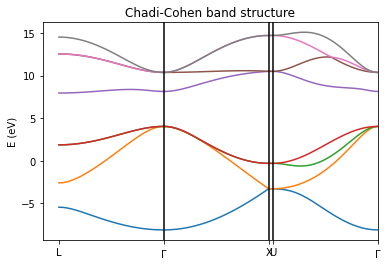

In [14]:
band()
